# Digit Recognizer
- dataset :  MNIST data
- task type: multi class classification
- structure: LeNet5
- accuracy achieved on kaggle : 0.98657

task link: https://www.kaggle.com/c/digit-recognizer/submissions?sortBy=date&group=all&page=1

In [1]:
import numpy as np
import pandas as pd
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
from sklearn.cross_validation import train_test_split
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

Using TensorFlow backend.


In [2]:
#helpers
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [3]:
def Lenet5Model(input_shape,classes):
    """
    Implementation of the Lenet5.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    X_input = Input(input_shape)
    ######### 1st Layer #######
    X = Conv2D(6, (5, 5), strides = (1, 1), name = 'conv1')(X_input)
    X = Activation('relu')(X)
    X = AveragePooling2D((2, 2),(2,2), name='avg_pool1')(X)
    ######## 2nd layer #########
    X = Conv2D(16, (5, 5), strides = (1, 1), name = 'conv2')(X)
    X = Activation('relu')(X)
    X = AveragePooling2D((2, 2),(2,2), name='avg_pool2')(X)
    ######## Fully connected layers ###########
    X = Flatten()(X)
    X = Dense(120, activation='tanh', name='fc1')(X)
    X = Dense(84, activation='tanh', name='fc2')(X)
    X = Dense(classes, activation='softmax', name='softmax-' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)

    model = Model(inputs = X_input, outputs = X, name='LeNet5')
    return model

In [4]:
model = Lenet5Model(input_shape = (28, 28, 1), classes = 10)

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training stage

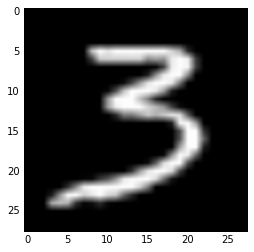

In [6]:
train=pd.read_csv('./data/train.csv')
y=train.label
ytrain=convert_to_one_hot(y,10)
train.drop("label",axis=1,inplace=True)
train=train.as_matrix()
L=train.shape[0]
train=train.reshape(L,28,28,1)
imshow(train[25,:,:,0],cmap="gray")

In [7]:
random_seed = 3
#validate size = 8%
train_x, val_x, train_y, val_y, = train_test_split(train, ytrain.T, test_size = 0.08, random_state=1)

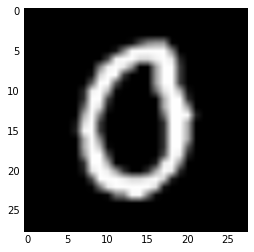

In [8]:
test=pd.read_csv('./data/test.csv')
test=test.as_matrix()
Ltest=test.shape[0]
test=test.reshape(Ltest,28,28,1)
imshow(test[100,:,:,0],cmap='gray')

In [9]:
model.fit(train_x, train_y, epochs = 50, batch_size = 64)

Epoch 1/50
38640/38640 [==============================] - 19s 502us/step - loss: 0.3647 - acc: 0.8939
Epoch 2/50
38640/38640 [==============================] - 18s 468us/step - loss: 0.1162 - acc: 0.9642
Epoch 3/50
38640/38640 [==============================] - 18s 471us/step - loss: 0.0865 - acc: 0.9730
Epoch 4/50
38640/38640 [==============================] - 18s 474us/step - loss: 0.0721 - acc: 0.9776
Epoch 5/50
38640/38640 [==============================] - 19s 489us/step - loss: 0.0610 - acc: 0.9798
Epoch 6/50
38640/38640 [==============================] - 19s 490us/step - loss: 0.0530 - acc: 0.9837
Epoch 7/50
38640/38640 [==============================] - 19s 486us/step - loss: 0.0501 - acc: 0.9843
Epoch 8/50
38640/38640 [==============================] - 19s 483us/step - loss: 0.0415 - acc: 0.9875
Epoch 9/50
38640/38640 [==============================] - 20s 506us/step - loss: 0.0453 - acc: 0.9850
Epoch 10/50
38640/38640 [==============================] - 19s 495us/step - loss: 

## Validation 

In [10]:
preds = model.evaluate(x=val_x,y=val_y)

print
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

3360/3360 [==============================] - 1s 243us/step

Loss = 0.06467530536797962
Test Accuracy = 0.9836309523809523


## Make predictions

In [11]:
predictions=model.predict(test)
numbers=np.argmax(predictions,axis=1)

In [12]:
ids=np.arange(1,Ltest+1)
df = pd.DataFrame({'ImageId':ids, 'Label': numbers})

df.to_csv("output/model1.csv", index=False)

## details about this model

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 24, 24, 6)         156       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 6)         0         
_________________________________________________________________
avg_pool1 (AveragePooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 8, 8, 16)          2416      
_________________________________________________________________
activation_2 (Activation)    (None, 8, 8, 16)          0         
_________________________________________________________________
avg_pool2 (AveragePooling2D) (None, 4, 4, 16)          0         
__________

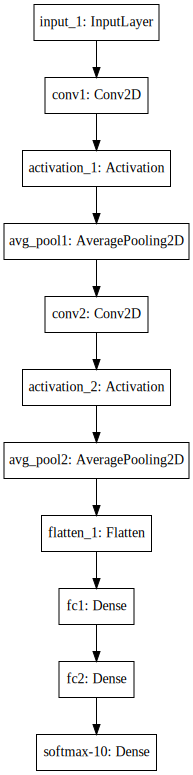

In [14]:
plot_model(model, to_file='output/model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))